Importing all the required libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

Reading the CSV file

In [462]:
data = pd.read_csv('train.csv')

In [463]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Dealing with Null Values

In [464]:
print(data.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64


Deleting columns with a lot of null values

In [465]:
data.drop(columns=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu", "Id"],inplace=True)

Looking at the columns with some null values

In [466]:
print(data.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageCond        81
GarageQual        81
                ... 
CentralAir         0
HeatingQC          0
SaleCondition      0
TotalBsmtSF        0
MSSubClass         0
Length: 75, dtype: int64


Since a bunch of them were wrongly marked Null. We'll replace NA with a string

In [467]:
data["GarageType"] = data["GarageType"].fillna("NoGarage")
data["GarageCond"] = data["GarageCond"].fillna("Po")
data["GarageFinish"] = data["GarageFinish"].fillna("NoGarage")
data["GarageQual"] = data["GarageQual"].fillna("Po")

In [468]:
data["MasVnrType"]= data["MasVnrType"].fillna("NoBrick")

In [469]:
data["BsmtQual"]= data["BsmtQual"].fillna("Po")
data["BsmtCond"] = data["BsmtCond"].fillna("Po")
data["BsmtExposure"] = data["BsmtExposure"].fillna("Po")

In [470]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [471]:
data.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
BsmtFinType2     38
BsmtFinType1     37
MasVnrArea        8
               ... 
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
MSSubClass        0
Length: 75, dtype: int64

In [472]:
data["LotFrontage"].fillna(data["LotFrontage"].median(),inplace=True)

In [473]:
data.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
BsmtFinType2    38
BsmtFinType1    37
MasVnrArea       8
Electrical       1
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
MSSubClass       0
Length: 75, dtype: int64

"GarageYrBlt" is very similar to YearBlt, since we'll drop it to avoid multicollinearity

In [474]:
data.drop(columns=["GarageYrBlt"],inplace=True)

In [475]:
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("NoBasement")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("NoBasement")

In [476]:
data.isnull().sum().sort_values(ascending=False)

MasVnrArea      8
Electrical      1
SalePrice       0
ExterCond       0
RoofMatl        0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
MSSubClass      0
Length: 74, dtype: int64

Looking at all the non-null values

In [477]:
data= data[~data["MasVnrArea"].isnull()]
data= data[~data["Electrical"].isnull()]

Last sanity check to make sure all null values are deleted

In [478]:
data.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
MSSubClass      0
Length: 74, dtype: int64

In [479]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

### Dealing with Multicollinearity

Checking for correlation between features

<AxesSubplot:>

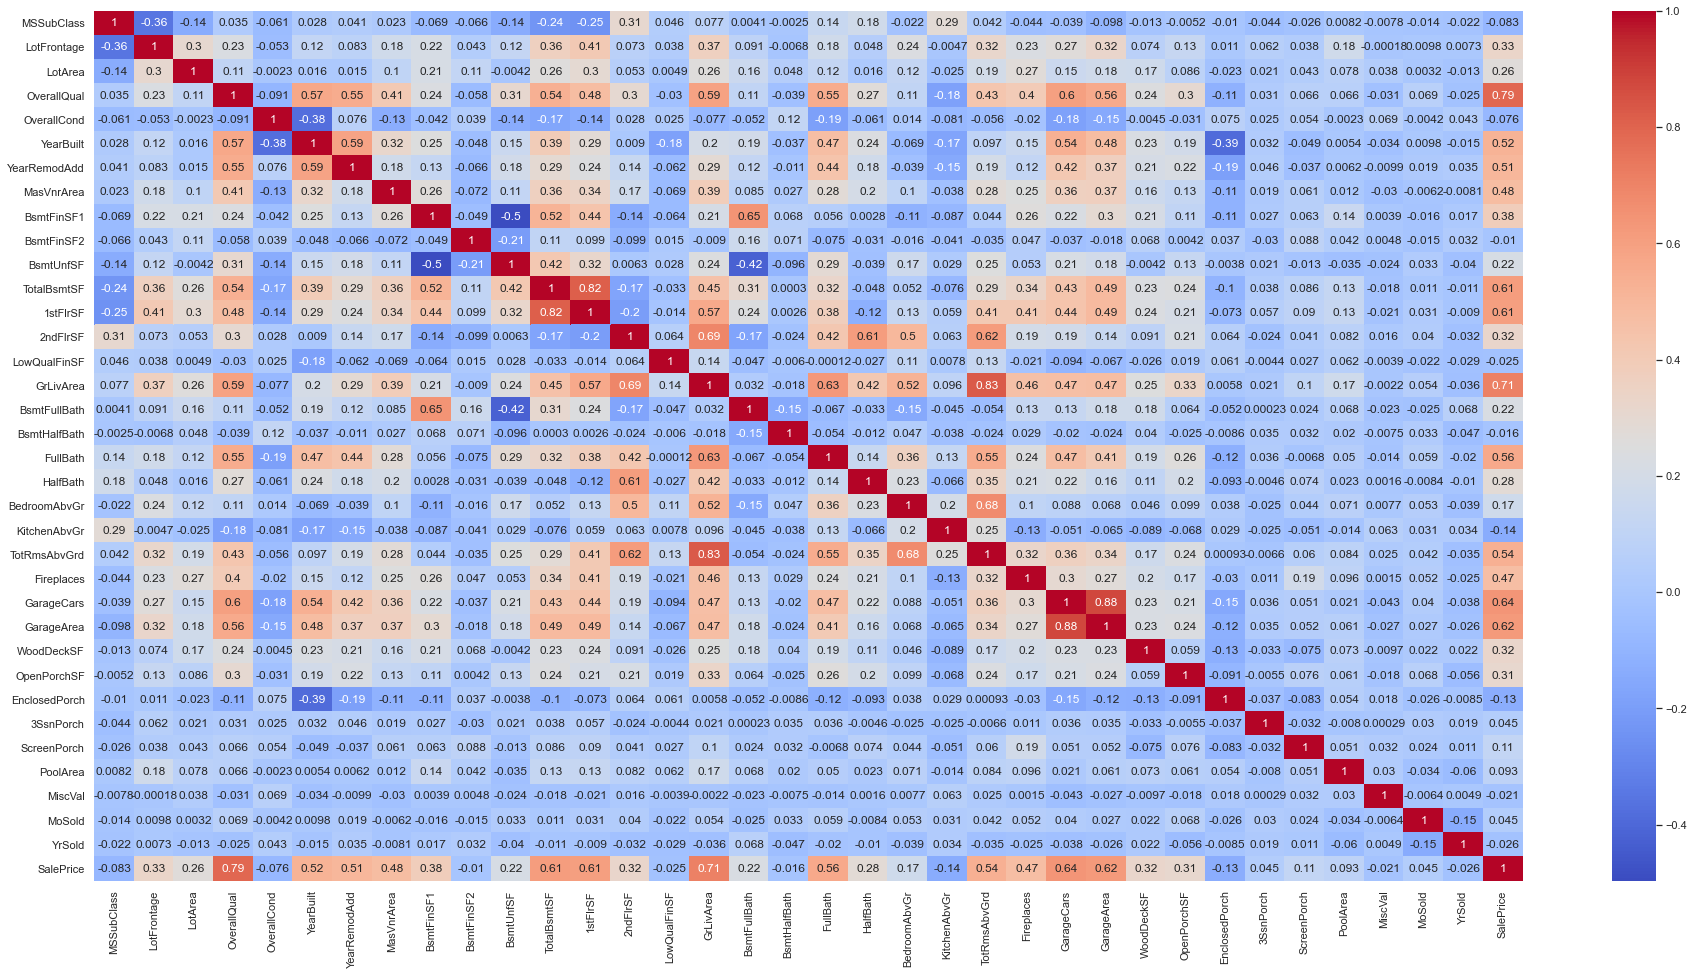

In [481]:
sns.set(rc = {'figure.figsize':(32,16)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Dropping features with very high correlation with other features

In [482]:
data.drop(columns=["GarageCars","YearRemodAdd","TotRmsAbvGrd","LotFrontage"],inplace=True)


Looking into columns and seeing if we have a variety of data to play around with or not

In [483]:
data["Street"].value_counts()

Pave    1445
Grvl       6
Name: Street, dtype: int64

1445 out of 1451 values are Pave so dropping this column

In [484]:
data.drop(columns=["Street"],inplace=True)

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   LotShape       1451 non-null   object 
 4   LandContour    1451 non-null   object 
 5   Utilities      1451 non-null   object 
 6   LotConfig      1451 non-null   object 
 7   LandSlope      1451 non-null   object 
 8   Neighborhood   1451 non-null   object 
 9   Condition1     1451 non-null   object 
 10  Condition2     1451 non-null   object 
 11  BldgType       1451 non-null   object 
 12  HouseStyle     1451 non-null   object 
 13  OverallQual    1451 non-null   int64  
 14  OverallCond    1451 non-null   int64  
 15  YearBuilt      1451 non-null   int64  
 16  RoofStyle      1451 non-null   object 
 17  RoofMatl       1451 non-null   object 
 18  Exterior

Similar process with Landslope

In [486]:
data["LandSlope"].value_counts()

Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Dropping it due to lack of variety

In [487]:
data.drop(columns=["LandSlope"],inplace=True)

Dropping other columns that don't provide a lot of value

In [488]:
data.drop(columns=["BsmtFinSF1","BsmtFinSF2","MiscVal","3SsnPorch"],inplace=True)

Quantifying categorical data and replacing words with rankings

In [489]:
data["GarageQual"] = data["GarageQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data["GarageCond"] = data["GarageCond"].map({"Ex":5, "Gd":4, "TA":3,"Fa":2, "Po":1 })
data["BsmtExposure"] = data["BsmtExposure"].map({"Gd":3, "Av":2, "Mn":1, "No":0, "Po":0 })
data["BsmtFinType1"] = data["BsmtFinType1"].map({'GLQ':5, 'ALQ':4, 'BLQ':3,'Rec':2,'LwQ':1, 'Unf':0, "NoBasement":0})
data["BsmtFinType2"]= data["BsmtFinType2"].map({'GLQ':5, 'ALQ':4, 'BLQ':3,'Rec':2,'LwQ':1, 'Unf':0,"NoBasement":0})
data["ExterQual"]= data["ExterQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data["ExterCond"]= data["ExterCond"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data["BsmtQual"] = data["BsmtQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data["BsmtCond"] = data["BsmtCond"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data["HeatingQC"] = data["HeatingQC"].map({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1})
data["KitchenQual"] = data["KitchenQual"].map({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1})


Sanity check -

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   LotShape       1451 non-null   object 
 4   LandContour    1451 non-null   object 
 5   Utilities      1451 non-null   object 
 6   LotConfig      1451 non-null   object 
 7   Neighborhood   1451 non-null   object 
 8   Condition1     1451 non-null   object 
 9   Condition2     1451 non-null   object 
 10  BldgType       1451 non-null   object 
 11  HouseStyle     1451 non-null   object 
 12  OverallQual    1451 non-null   int64  
 13  OverallCond    1451 non-null   int64  
 14  YearBuilt      1451 non-null   int64  
 15  RoofStyle      1451 non-null   object 
 16  RoofMatl       1451 non-null   object 
 17  Exterior1st    1451 non-null   object 
 18  Exterior

Listing all categorical variables

In [491]:
list_cat_columns = data.select_dtypes("object")

Creating dummy variables

In [492]:
MS_Dummies = pd.get_dummies(list_cat_columns,drop_first=True)

In [493]:
MS_Dummies.shape

(1451, 154)

In [494]:
full_data = pd.concat([data,MS_Dummies],axis=1)

In [495]:
full_data.drop(columns=list_cat_columns,inplace=True)

In [496]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(38), uint8(154)
memory usage: 671.7 KB


Shortlisting all the quantitative variables and scaling them

In [497]:
minmax = MinMaxScaler()

full_data[full_data.columns]= minmax.fit_transform(full_data[full_data.columns])

Splitting data into test and train

In [498]:
train_data,test_data = train_test_split(full_data,test_size=0.3,random_state=30)

In [499]:
y_test = test_data.pop("SalePrice")
X_test = test_data

In [500]:
y_train = train_data.pop("SalePrice")
X_train = train_data

Sanity Check -

In [501]:
train_data_integer.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
Neighborhood_Gilbert     0
Neighborhood_OldTown     0
Neighborhood_NridgHt     0
Neighborhood_NoRidge     0
                        ..
Exterior1st_Stucco       0
Exterior1st_Stone        0
Exterior1st_Plywood      0
Exterior1st_MetalSd      0
MSSubClass               0
Length: 191, dtype: int64

Initiating Lasso Regression

In [502]:
lasso_reg=Lasso() 
alpha = [0.001,0.01,0.1,0.5,1,5,10,100] 
param_grid = {"alpha":alpha}
grid = GridSearchCV(lasso_reg,param_grid,cv=5) 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]})

Best Alpha value is

In [503]:
grid.best_params_

{'alpha': 0.001}

In [504]:
grid.score(X_train,y_train)

0.8151255840360508

In [505]:
grid.cv_results_


{'mean_fit_time': array([0.01291456, 0.00271869, 0.00230937, 0.00265198, 0.00219717,
        0.00219502, 0.00226207, 0.00220051]),
 'std_fit_time': array([1.62451755e-03, 1.99975124e-04, 1.14846346e-04, 9.01073229e-04,
        3.20796960e-05, 3.13846524e-05, 7.13093031e-05, 2.16877575e-05]),
 'mean_score_time': array([0.00291629, 0.00151052, 0.00174618, 0.00160699, 0.00145526,
        0.00145726, 0.00146422, 0.00146141]),
 'std_score_time': array([1.05231079e-03, 3.72295325e-05, 4.98738001e-04, 2.71979756e-04,
        1.13527307e-05, 2.36192804e-05, 1.42274976e-05, 1.15652427e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 5},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([ 0.7833468 ,  0.30323799,

In [506]:
lasso_f = Lasso(alpha=0.001)
lasso_f.fit(X_train,y_train)

Lasso(alpha=0.001)

In [507]:
lasso_f.coef_


array([-2.46717955e-02,  0.00000000e+00,  1.58246078e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.22955758e-02,  0.00000000e+00,
        2.50434805e-02,  0.00000000e+00,  2.62986212e-02,  1.45066302e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.52396123e-03,  0.00000000e+00,  1.95606075e-01,
        0.00000000e+00,  0.00000000e+00,  3.46159078e-02,  2.81110359e-04,
        0.00000000e+00, -0.00000000e+00,  5.63023254e-02,  4.12423567e-02,
        5.51576359e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.06064311e-02,  0.00000000e+00, -0.00000000e+00,
       -6.56480959e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.79910897e-03, -0.00000000e+00, -0.00000000e+00,
       -6.61676965e-05,  

In [508]:
y_pred_lasso = lasso_f.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8143654343983862

### 33 Shortlisted features :)

In [511]:
df_coeff = pd.DataFrame({"Categories":X_train.columns,"Beta":lasso_f.coef_})
tabular_coeff = df_coeff[df_coeff["Beta"]!=0.0]

print(tabular_coeff)

                Categories      Beta
0               MSSubClass -0.024672
2              OverallQual  0.158246
6                ExterQual  0.042296
8                 BsmtQual  0.025043
10            BsmtExposure  0.026299
11            BsmtFinType1  0.014507
17                2ndFlrSF  0.005524
19               GrLivArea  0.195606
22                FullBath  0.034616
23                HalfBath  0.000281
26             KitchenQual  0.056302
27              Fireplaces  0.041242
28              GarageArea  0.055158
41             MSZoning_RM -0.010606
44            LotShape_Reg -0.006565
49       LotConfig_CulDSac  0.005799
52        LotConfig_Inside -0.000066
58    Neighborhood_Crawfor  0.008807
59    Neighborhood_Edwards -0.000648
67    Neighborhood_NoRidge  0.027991
68    Neighborhood_NridgHt  0.032829
74    Neighborhood_StoneBr  0.008166
78         Condition1_Norm  0.002248
103        RoofStyle_Gable -0.007220
105          RoofStyle_Hip  0.008166
117    Exterior1st_BrkFace  0.000378
1

In [522]:
tabular_coeff.sort_values(by = "Beta", ascending  =False)

,Categories,Beta
19,GrLivArea,0.195606
2,OverallQual,0.158246
26,KitchenQual,0.056302
28,GarageArea,0.055158
6,ExterQual,0.042296
27,Fireplaces,0.041242
22,FullBath,0.034616
68,Neighborhood_NridgHt,0.032829
67,Neighborhood_NoRidge,0.027991
10,BsmtExposure,0.026299


Initiating Ridge Regression

In [512]:
ridge_reg= Ridge() 
alpha = [0.001,0.01,0.1,0.5,1,5,10,100] 
param_grid = {"alpha":alpha}
grid = GridSearchCV(ridge_reg,param_grid,cv=5) 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]})

In [513]:
grid.best_params_

{'alpha': 5}

In [514]:
grid.score(X_train,y_train)

0.8804698978638085

In [515]:
y_pred_r = grid.predict(X_test)

In [516]:
r2_score(y_test,y_pred_r)

0.8461023547221351

In [517]:
grid.cv_results_

{'mean_fit_time': array([0.00757318, 0.0041832 , 0.00343723, 0.00327177, 0.00354414,
        0.00354562, 0.00356536, 0.00344553]),
 'std_fit_time': array([0.00371163, 0.0006764 , 0.00014659, 0.00015051, 0.00028861,
        0.00031553, 0.00037182, 0.00020574]),
 'mean_score_time': array([0.00321865, 0.00197921, 0.00157371, 0.0015202 , 0.001859  ,
        0.00172105, 0.00171843, 0.00170832]),
 'std_score_time': array([7.69198862e-04, 3.48427969e-04, 7.30858689e-05, 1.02773619e-05,
        4.62617212e-04, 4.26728833e-04, 2.28720529e-04, 4.25641135e-04]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 5},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.38868081, 0.40167278, 0.48085604, 0.61923198, 0.6808802

Here's the final Ridge Model

In [455]:
ridge_f = Lasso(alpha=5)
ridge_f.fit(X_train,y_train)

Lasso(alpha=5)

The End